In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Install necessary libraries if not already installed
!pip install scikit-learn

# Load the dataset (replace 'motor_bekas.xlsx' with your actual file name)
try:
    df = pd.read_excel('/content/motor_second.xlsx')
except FileNotFoundError:
    print("Error: '/content/motor_second.xlsx' not found. Please upload your dataset.")
    exit()


# Data Preprocessing
# Handle missing values (replace with mean for numerical features, mode for categorical)
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Convert categorical features to numerical using

<ipython-input-5-0f08afcd6832>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-5-0f08afcd6832>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

<ipython-input-11-78be0ae84dd6>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-11-78be0ae84dd6>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Recommendations for motor at index 0:
             model  tahun  harga transmisi  odometer  jenis  pajak  \
77    Supra X 125   2017   8500    Manual     16708  Bebek  145.0   
144   Supra X 125   2017   8498    Manual     19685  Bebek  145.0   
159   Supra X 125   2017   8998    Manual     16900  Bebek  145.0   

     konsumsiBBM  mesin  
77          58.9  125.0  
144         58.9  125.0  
159         55.4  125.0  

Top Selling Motor Models:
 model
Vario 125      896509
Revo           282322
Genio          259564
Supra X 125    214651
CRF 150        137491
Verza          123278
Sonic 150       98794
PCX             94527
BeAT Street     57486
Supra GTR       51596
CB150R          34800
BeAT             8300
BeAT             6300
Name: harga, dtype: int64


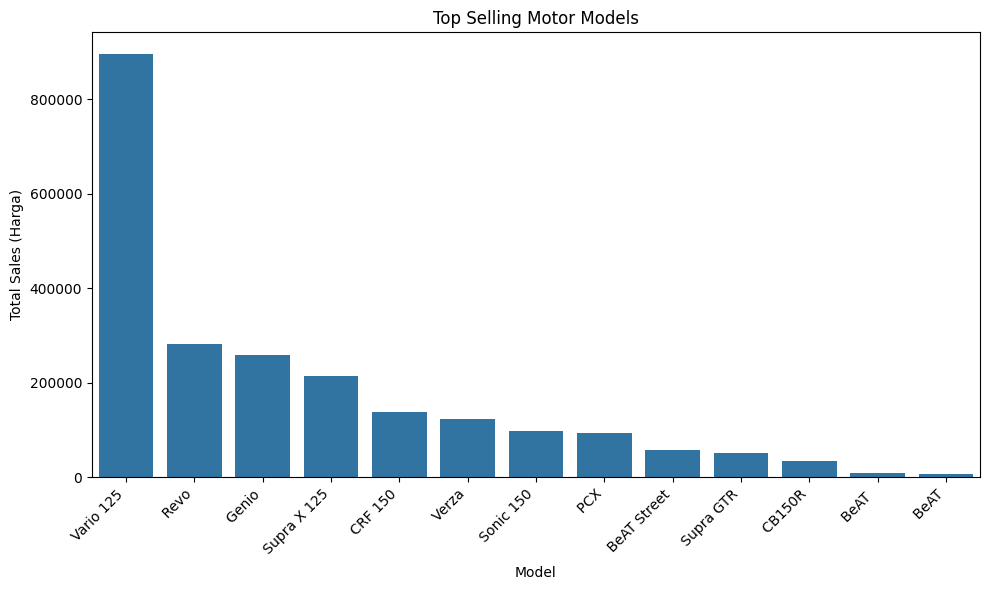

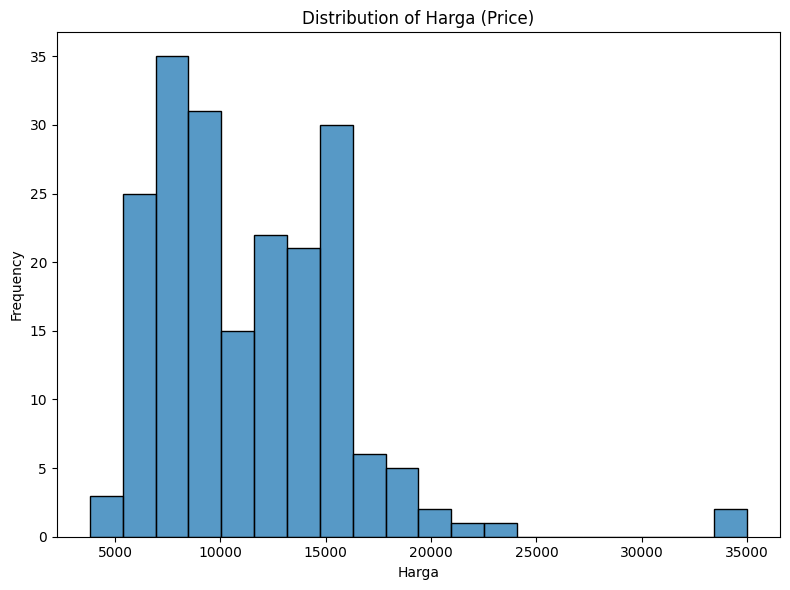

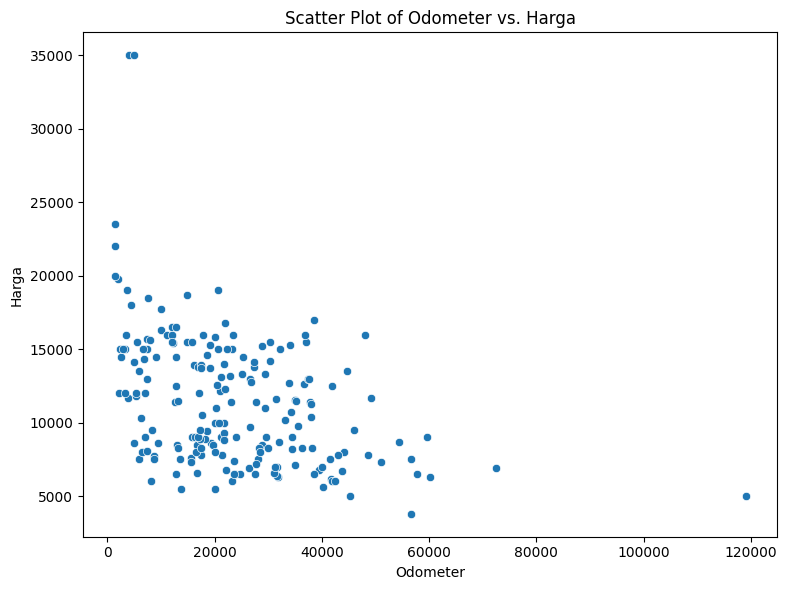

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Install necessary libraries if not already installed
!pip install scikit-learn matplotlib seaborn

# Load the dataset (replace 'motor_bekas.xlsx' with your actual file name)
try:
    df = pd.read_excel('/content/motor_second.xlsx')
except FileNotFoundError:
    print("Error: '/content/motor_second.xlsx' not found. Please upload your dataset.")
    exit()

# Data Preprocessing
# Handle missing values (replace with mean for numerical features, mode for categorical)
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Convert categorical features to numerical using one-hot encoding
# Keep a copy of the original DataFrame before one-hot encoding
original_df = df.copy()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('harga', axis=1))  # Assuming 'harga' is the target variable

# Recommendation System (using cosine similarity)
def recommend_stock(motor_index, top_n=5):
    similarities = cosine_similarity(scaled_features[motor_index].reshape(1, -1), scaled_features)
    similar_motor_indices = np.argsort(similarities[0])[::-1][1:top_n + 1]  # Exclude itself
    return original_df.iloc[similar_motor_indices]  # Return from original_df for better readability


# Example usage: Recommend similar motors to the motor at index 0
recommendations = recommend_stock(0, top_n=3)
print("Recommendations for motor at index 0:\n", recommendations)


# Sales Analysis (example: top-selling models)
# Use the original DataFrame for sales analysis
top_selling_models = original_df.groupby('model')['harga'].sum().sort_values(ascending=False)  # Assuming 'Merk' represents the model
print("\nTop Selling Motor Models:\n", top_selling_models)

# Data Visualization
# 1. Top Selling Models Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_selling_models.index, y=top_selling_models.values)
plt.title('Top Selling Motor Models')
plt.xlabel('Model')
plt.ylabel('Total Sales (Harga)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# 2. Distribution of Harga (Price)
plt.figure(figsize=(8, 6))
sns.histplot(original_df['harga'], bins=20)
plt.title('Distribution of Harga (Price)')
plt.xlabel('Harga')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 3. Scatter plot of Odometer vs. Harga
plt.figure(figsize=(8, 6))
sns.scatterplot(x='odometer', y='harga', data=original_df)
plt.title('Scatter Plot of Odometer vs. Harga')
plt.xlabel('Odometer')
plt.ylabel('Harga')
plt.tight_layout()
plt.show()

# Further analysis based on sales trends, price ranges, etc., can be done here

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Install necessary libraries if not already installed
!pip install scikit-learn

# Load the dataset (replace 'motor_bekas.xlsx' with your actual file name)
try:
    df = pd.read_excel('/content/motor_second.xlsx')
except FileNotFoundError:
    print("Error: '/content/motor_second.xlsx' not found. Please upload your dataset.")
    exit()


# Data Preprocessing
# Handle missing values (replace with mean for numerical features, mode for categorical)
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Convert categorical features to numerical using one-hot encoding
# Keep a copy of the original DataFrame before one-hot encoding
original_df = df.copy()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('harga', axis=1)) # Assuming 'harga' is the target variable


# Recommendation System (using cosine similarity)

def recommend_stock(motor_index, top_n=5):
    similarities = cosine_similarity(scaled_features[motor_index].reshape(1, -1), scaled_features)
    similar_motor_indices = np.argsort(similarities[0])[::-1][1:top_n + 1] # Exclude itself
    return df.iloc[similar_motor_indices]


# Example usage: Recommend similar motors to the motor at index 0
recommendations = recommend_stock(0, top_n=3)
print(recommendations)


# Sales Analysis (example: top-selling models)
# Use the original DataFrame for sales analysis
top_selling_models = original_df.groupby('model')['harga'].sum().sort_values(ascending=False)  # Assuming 'Merk' represents the model
print("\nTop Selling Motor Models:")
print(top_selling_models)

#Further analysis based on sales trends, price ranges, etc., can be done here

     tahun  harga  odometer  pajak  konsumsiBBM  mesin  model_ BeAT   \
77    2017   8500     16708  145.0         58.9  125.0         False   
144   2017   8498     19685  145.0         58.9  125.0         False   
159   2017   8998     16900  145.0         55.4  125.0         False   

     model_ BeAT Street  model_ CB150R  model_ CRF 150  ...  model_ Sonic 150  \
77                False          False           False  ...             False   
144               False          False           False  ...             False   
159               False          False           False  ...             False   

     model_ Supra GTR  model_ Supra X 125  model_ Vario 125  model_ Verza  \
77              False                True             False         False   
144             False                True             False         False   
159             False                True             False         False   

     transmisi_Kopling  transmisi_Manual  jenis_Skuter  jenis_Sport  \
77    

<ipython-input-10-1f7d54837afa>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-10-1f7d54837afa>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 